# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [2]:
# prerequisite package imports

#YOUR CODE
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [3]:
#YOUR CODE
from google.colab import drive
drive.mount('/content/drive')

# Path to the file
file_path = '/content/drive/MyDrive/fuel_econ.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head(11)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

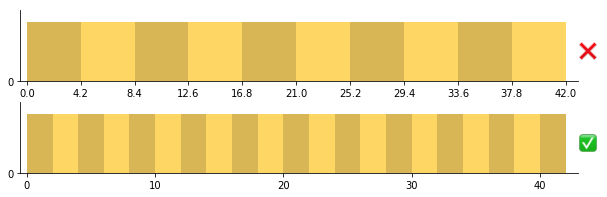

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








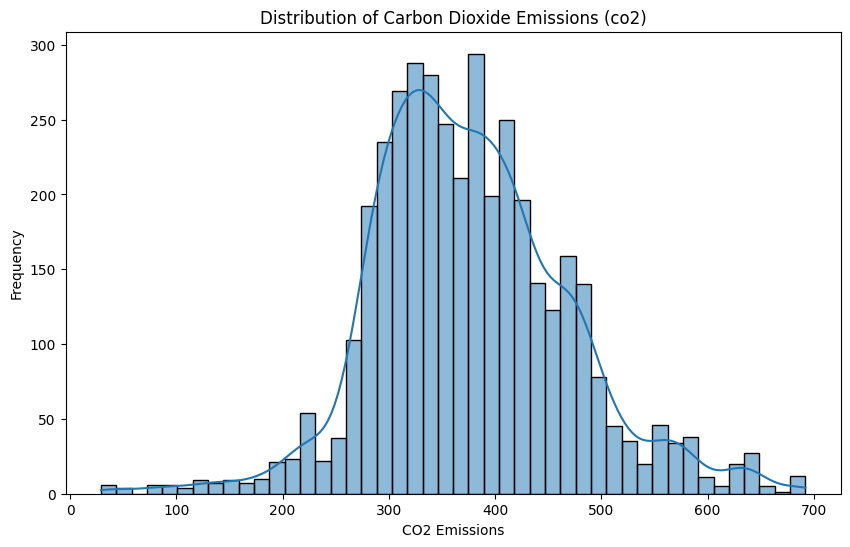

In [4]:
# YOUR CODE HERE
data = pd.read_csv(file_path)

# Identify the column related to Carbon Dioxide emissions
# It's common to find variations in the column name, like 'co2', 'CO2', 'carbon_dioxide', etc.
co2_columns = [col for col in data.columns if 'co2' in col.lower()]

if co2_columns:
    # Assuming the first column found is the relevant one
    co2_column = co2_columns[0]

    # Plotting the histogram for Carbon Dioxide emissions
    plt.figure(figsize=(10, 6))
    sns.histplot(data[co2_column], kde=True)
    plt.title(f'Distribution of Carbon Dioxide Emissions ({co2_column})')
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The dataset does not contain a column for Carbon Dioxide emissions.")


In [ ]:
# YOUR CODE HERE
data = pd.read_csv(file_path)

# Identify the column related to Carbon Dioxide emissions
# It's common to find variations in the column name, like 'co2', 'CO2', 'carbon_dioxide', etc.
co2_columns = [col for col in data.columns if 'co2' in col.lower()]

if co2_columns:
    # Assuming the first column found is the relevant one
    co2_column = co2_columns[0]

    # Plotting the histogram for Carbon Dioxide emissions
    plt.figure(figsize=(10, 6))
    sns.histplot(data[co2_column], kde=True)
    plt.title(f'Distribution of Carbon Dioxide Emissions ({co2_column})')
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The dataset does not contain a column for Carbon Dioxide emissions.")


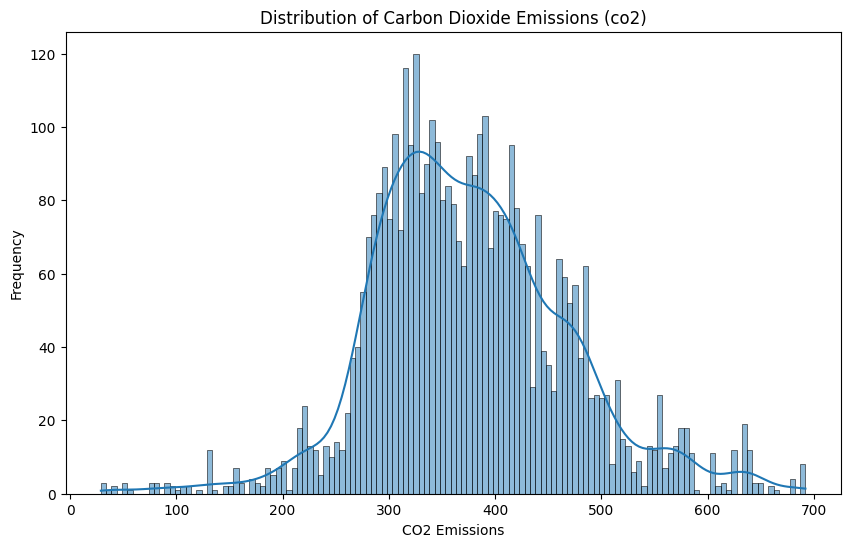

In [8]:
# YOUR CODE HERE
ata = pd.read_csv(file_path)

# Identify the column related to Carbon Dioxide emissions
# It's common to find variations in the column name, like 'co2', 'CO2', 'carbon_dioxide', etc.
co2_columns = [col for col in data.columns if 'co2' in col.lower()]

if co2_columns:
    # Assuming the first column found is the relevant one
    co2_column = co2_columns[0]

    # Plotting the histogram for Carbon Dioxide emissions
    plt.figure(figsize=(10, 6))
    sns.histplot(data[co2_column], kde=True, binwidth=5)  # Adjusted bin width to 10
    plt.title(f'Distribution of Carbon Dioxide Emissions ({co2_column})')
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The dataset does not contain a column for Carbon Dioxide emissions.")



**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

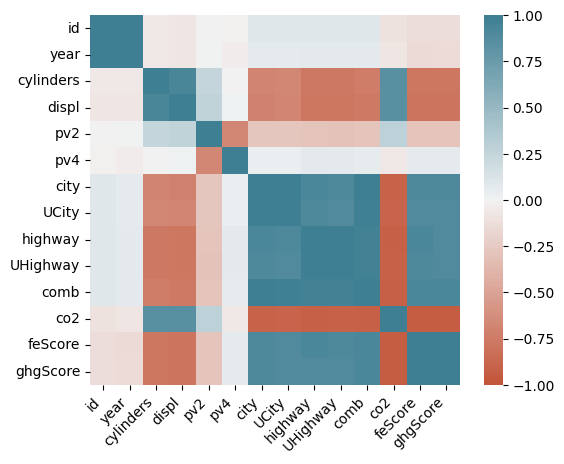

<ipython-input-10-ebc7f8349d67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


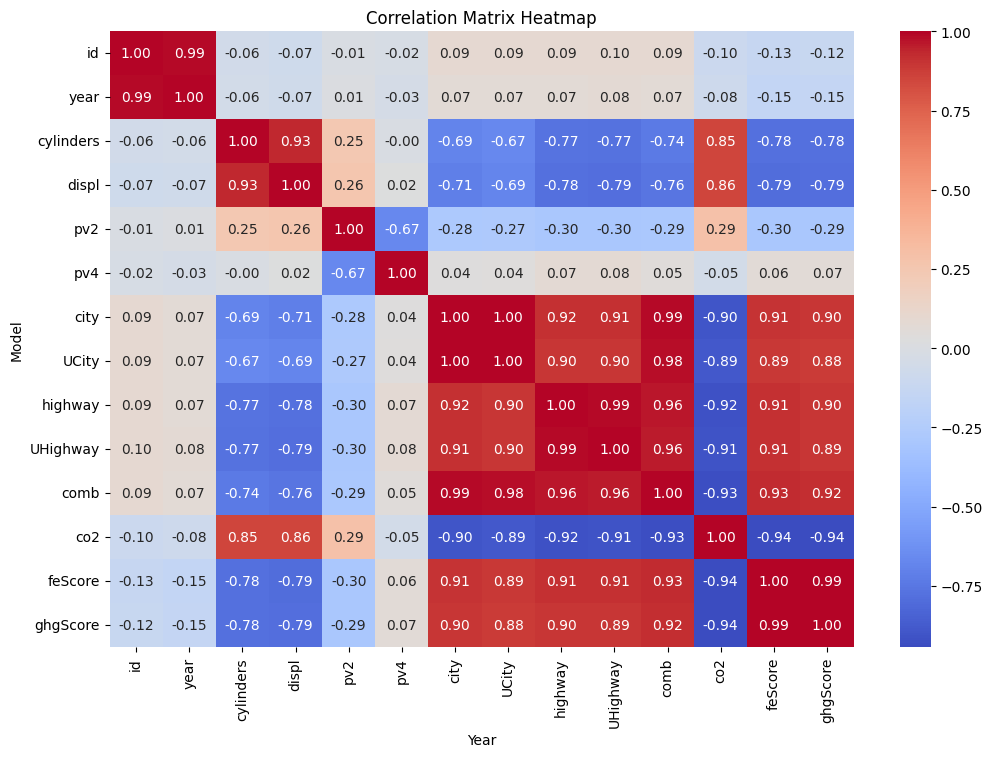

In [10]:
# Compute the correlation matrix
corr_matrix = data.corr()


# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.ylabel('Model')
plt.xlabel('Year')
plt.show()

# Interpretation

The heatmap displays the correlation coefficients between different pairs of variables in the dataset. Each cell in the heatmap shows the correlation value (ranging from -1 to 1) between two variables, with the color intensity and annotation indicating the strength and nature (positive or negative) of the correlation. This visualization can help identify relationships and patterns among the variables.

# Column's I'd Drop and Why

Here are some of the factors to consider that guide feature selection in data analysis and modeling.

1.   Multicollinearity: If two or more independent variables are highly correlated with each other, it can cause multicollinearity issues. In such cases, you might consider dropping one of the correlated variables. For example, if 'CO2 Emissions' and 'Fuel Consumption' are highly correlated, you might drop one of them as they might provide redundant information.

2.   Relevance to the Target: Any column that doesn’t provide relevant information for predicting the GHG score should be considered for removal. This includes columns that are unrelated to emissions or fuel efficiency.

3. Data Quality: Columns with a significant amount of missing values, or those that have mostly constant or repetitive values, might not be useful and could be dropped.

4.  Domain Knowledge: Understanding the domain can help identify which features are likely to influence the GHG score. For instance, factors like engine size, fuel type, and vehicle weight might be relevant, while attributes like color, location of sale, or dealership might not be.  List item

5.   Redundancy: Columns that are redundant or provide the same information in different formats can be dropped.






